In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Vectorization applying TF-IDF**

In [2]:
# Load the tokenized datasets (assuming it is in the same location as the notebook)
data_r2o1_train = pd.read_csv("data_r2o1_train_tokenized.csv")
data_r2o1_test = pd.read_csv("data_r2o1_test_tokenized.csv")

In [5]:
# Remove rows with missing values
data_r2o1_train.dropna(subset=['reviews.text'], inplace=True)
data_r2o1_test.dropna(subset=['reviews.text'], inplace=True)

In [6]:
print(data_r2o1_train.isnull().sum())
print(data_r2o1_test.isnull().sum())

reviews.text      0
reviews.rating    0
sentiment         0
dtype: int64
reviews.text      0
reviews.rating    0
sentiment         0
dtype: int64


In [7]:
# Step 4: Vectorize the dataset
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(data_r2o1_train["reviews.text"])
X_test = vectorizer.transform(data_r2o1_test["reviews.text"])
y_train = data_r2o1_train["sentiment"]
y_test = data_r2o1_test["sentiment"]

# **Models Training and Evaluation**

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


--- Training on `dataset_drop` ---

Training Naive Bayes...
Test Accuracy (Naive Bayes): 0.7238

Classification Report (Naive Bayes - Test Set):
              precision    recall  f1-score   support

    negative       0.70      0.82      0.75       390
     neutral       0.58      0.20      0.30       290
    positive       0.76      0.92      0.83       587

    accuracy                           0.72      1267
   macro avg       0.68      0.65      0.63      1267
weighted avg       0.70      0.72      0.69      1267


Confusion Matrix (Naive Bayes - Test Set):
[[539  18  30]
 [123  58 109]
 [ 46  24 320]]


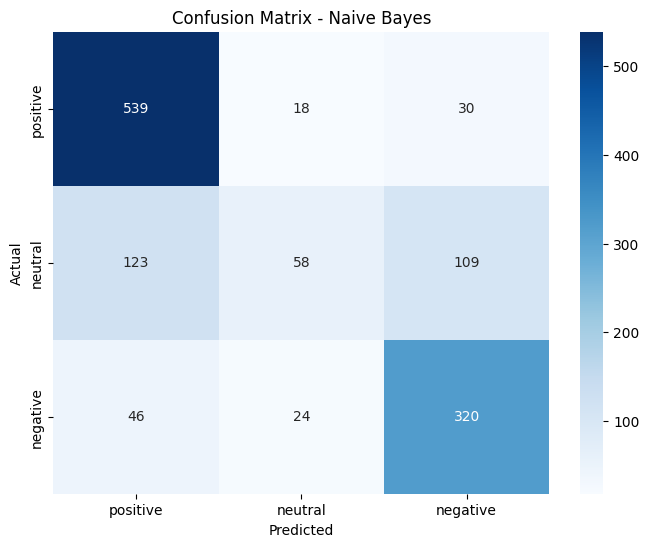


Training Logistic Regression...
Test Accuracy (Logistic Regression): 0.7380

Classification Report (Logistic Regression - Test Set):
              precision    recall  f1-score   support

    negative       0.74      0.76      0.75       390
     neutral       0.54      0.41      0.47       290
    positive       0.80      0.89      0.84       587

    accuracy                           0.74      1267
   macro avg       0.70      0.69      0.69      1267
weighted avg       0.72      0.74      0.73      1267


Confusion Matrix (Logistic Regression - Test Set):
[[520  49  18]
 [ 83 120  87]
 [ 43  52 295]]


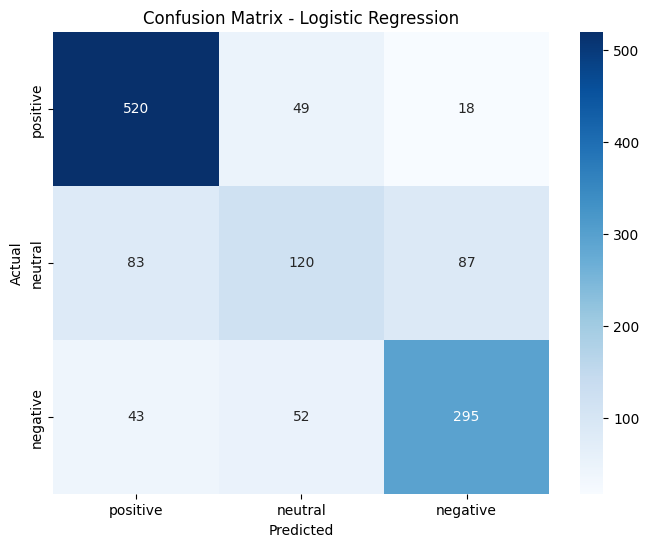


Training SVM...
Test Accuracy (SVM): 0.7395

Classification Report (SVM - Test Set):
              precision    recall  f1-score   support

    negative       0.74      0.76      0.75       390
     neutral       0.54      0.40      0.46       290
    positive       0.80      0.89      0.84       587

    accuracy                           0.74      1267
   macro avg       0.70      0.69      0.69      1267
weighted avg       0.72      0.74      0.73      1267


Confusion Matrix (SVM - Test Set):
[[523  44  20]
 [ 90 116  84]
 [ 38  54 298]]


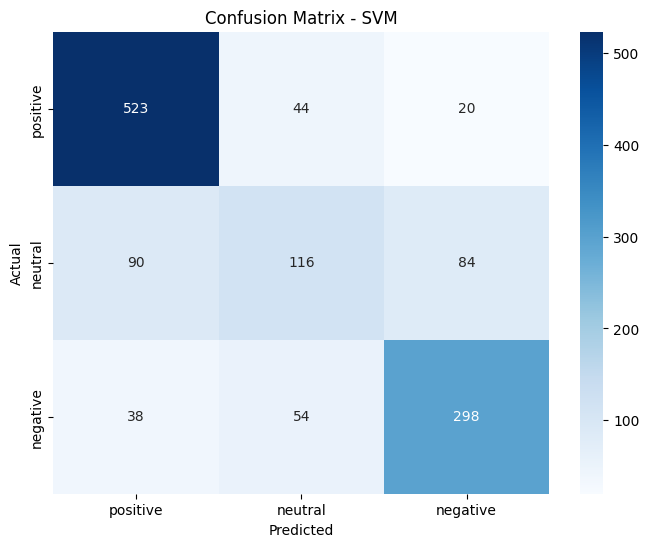


Training Random Forest...
Test Accuracy (Random Forest): 0.7364

Classification Report (Random Forest - Test Set):
              precision    recall  f1-score   support

    negative       0.74      0.73      0.73       390
     neutral       0.57      0.37      0.45       290
    positive       0.78      0.92      0.85       587

    accuracy                           0.74      1267
   macro avg       0.70      0.67      0.68      1267
weighted avg       0.72      0.74      0.72      1267


Confusion Matrix (Random Forest - Test Set):
[[542  31  14]
 [ 97 108  85]
 [ 55  52 283]]


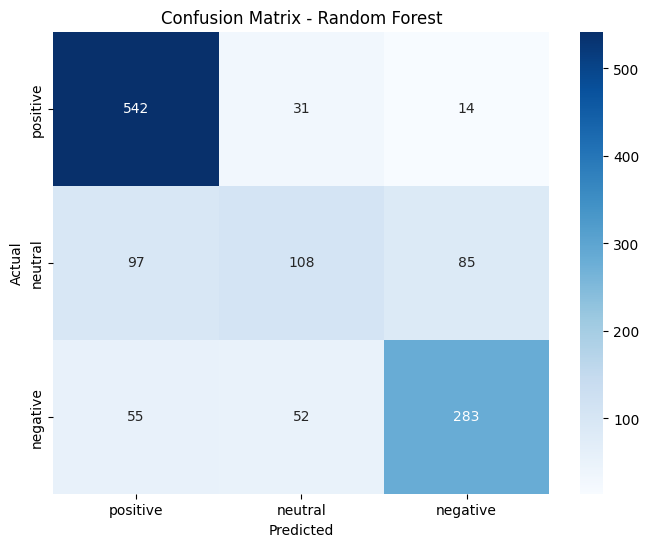

In [9]:

# Function to train, evaluate, and calculate confusion matrix
def train_evaluate_with_confusion_matrix(model, X_train, y_train, X_test, y_test, model_name):
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    # Evaluate on test set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy ({model_name}): {test_accuracy:.4f}")

    # Classification Report
    print(f"\nClassification Report ({model_name} - Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix
    print(f"\nConfusion Matrix ({model_name} - Test Set):")
    cm = confusion_matrix(y_test, y_test_pred, labels=['positive', 'neutral', 'negative'])
    print(cm)

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return model

# Load vectorized features and labels
# Assuming `data_r2o1_train` and `train_recode` sentiment labels are in `y_data_r2o1_train` and `y_train_recode`
y_data_r2o1_train = data_r2o1_train['sentiment']
y_data_r2o1_test = data_r2o1_test['sentiment']


# Train and evaluate models on `dataset_drop`
print("\n--- Training on `dataset_drop` ---")
nb_drop = train_evaluate_with_confusion_matrix(MultinomialNB(), X_train, y_data_r2o1_train, X_test, y_data_r2o1_test, "Naive Bayes")
lr_drop = train_evaluate_with_confusion_matrix(LogisticRegression(max_iter=1000), X_train, y_data_r2o1_train, X_test, y_data_r2o1_test, "Logistic Regression")
svm_drop = train_evaluate_with_confusion_matrix(SVC(), X_train, y_data_r2o1_train, X_test, y_data_r2o1_test, "SVM")
rf_drop = train_evaluate_with_confusion_matrix(RandomForestClassifier(), X_train, y_data_r2o1_train, X_test, y_data_r2o1_test, "Random Forest")